In [3]:
from lib import transient
from imp import reload
# reload(transient)

import os
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as cmx
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import pandas as pd

In [15]:
filepath = 'E:/data/RuCl3/mat/kerr_rotation/fluence_3.8K/'
files = os.listdir(filepath)

cutFreq = 0.01 # THz
t0 = 85

key_parameter = 'pump_power'
description = ''

usebg = False
trs = []
k_parameters = []
data = {}
parameters = {}

if 'background.mat' in files:
    bg_trace = transient.Transient()
    bg_trace.import_file(filepath + 'background.mat', 
                           cleanData=False, 
                           key_parameter=key_parameter,description=description)
    files.remove('background.mat')
    bg_trace.crop_time_scale()
    bg_trace.shift_time(t0)
    bg_trace.filter_low_pass(cutFreq)
#     tr.flip_trace()
    bg_trace.remove_DC_offset()
    bg_trace.flip_time()
    usebg = True
    print(usebg)
    
for file in files:
    try:

        tr = transient.Transient()
        tr.import_file(filepath + file, 
                           cleanData=False, 
                           key_parameter=key_parameter,description=description)

        
        tr.crop_time_scale()
        tr.shift_time(t0)
        tr.filter_low_pass(cutFreq)
    #     tr.flip_trace()
        tr.remove_DC_offset()
        tr.flip_time()
        # save parameters
        trParameters = tr.get_metadata()
        for key, val in trParameters.items():
            try:
                parameters[key].append(val)
            except KeyError:
                parameters[key] = [val]
        analysis_log = parameters.pop('analysis_log')
        if usebg:
            tr.trace = tr.trace - bg_trace.trace
        k_parameters.append(float(getattr(tr,key_parameter)))

        data[getattr(tr,key_parameter)] = tr.trace       
    
#        tr.trace = np.divide(tr.trace,max(tr.trace))
    #     tr.trace = np.divide(tr.trace,tr.pump_power)
    except Exception as exc:
        print('skipped file: {0}\nerror: {1}'.format(file,exc))
data = pd.DataFrame(data,index=tr.time)
parameter_dataframe = pd.DataFrame(parameters, index = k_parameters)
analysis_log_dataframe = pd.DataFrame(analysis_log, index = k_parameters)
print(parameter_dataframe)
# for key, val in parameters.items():
#     print(str(key) + ': ')
#     print(val)

print('Imported {0} scan(s) as {1} dependence'.format(len(trs),trs[0].key_parameter))
data.plot(colormap='rainbow')


True
        R0                 date description key_parameter material  \
0.005  1.0  2016-12-06-18.30.00                pump_power    Ru3Cl   
0.010  1.0  2016-12-06-18.32.38                pump_power    Ru3Cl   
0.020  1.0  2016-12-06-18.35.10                pump_power    Ru3Cl   
0.040  1.0  2016-12-06-18.37.50                pump_power    Ru3Cl   
0.080  1.0  2016-12-06-18.40.40                pump_power    Ru3Cl   
0.160  1.0  2016-12-06-18.43.26                pump_power    Ru3Cl   
0.320  1.0  2016-12-06-18.45.50                pump_power    Ru3Cl   
0.640  1.0  2016-12-06-18.48.28                pump_power    Ru3Cl   
1.200  1.0  2016-12-06-18.51.30                pump_power    Ru3Cl   
2.400  1.0  2016-12-06-18.55.48                pump_power    Ru3Cl   
4.800  1.0  2016-12-06-18.58.26                pump_power    Ru3Cl   

                  name                                  original_filepath  \
0.005  Ru3Cl__0.005_mW  E:/data/RuCl3/mat/kerr_rotation/fluence_3.8K/R...   


IndexError: list index out of range

In [14]:
savepath = 'E:/data/RuCl3/HDF5/'
name = 'kerr_4K_fluence_dependence'
data.to_hdf(savepath + name + '.hdf5', 'data', mode="w")
parameter_dataframe.to_hdf(savepath + name + '.hdf5', 'parameters', mode='a', format='t')

TypeError: Cannot serialize the column [analysis_log] because
its data contents are [mixed] object dtype

In [29]:
data1 = pd.DataFrame()

In [32]:
data1 = pd.read_hdf(savepath + name + '.hdf5')

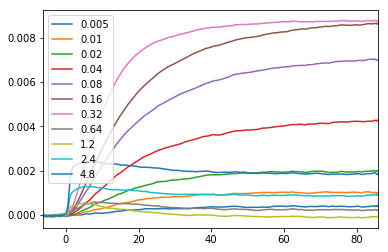

In [33]:
data1.plot()